# Load Libraries

In [2]:
# Install RPostgres if needed:
#install.packages("RPostgres")
#install.packages("tidyverse")

Installing package into ‘/home/elleven/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Installing package into ‘/home/elleven/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

also installing the dependencies ‘tinytex’, ‘rmarkdown’, ‘reprex’




In [1]:
library(DBI)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Connect to DB, load data, clean data

In [2]:
con <- dbConnect(
    RPostgres::Postgres(),
    dbname = 'npm_data', 
    user = 'federico',
    host = '127.0.0.1'
)

In [70]:
num_direct_runtime_deps <- dbGetQuery(con, "
select x from analysis.all_dep_counts where count_type = 'num_direct_runtime_deps'
")

In [71]:
num_direct_runtime_deps <- num_direct_runtime_deps$x

In [72]:
num_direct_runtime_deps <- table(num_direct_runtime_deps)
# cut it off at 200 values
num_direct_runtime_deps <- num_direct_runtime_deps[1:200]

In [73]:
num_direct_runtime_deps[1:200]

num_direct_runtime_deps
      0       1       2       3       4       5       6       7       8       9 
1154803  358991  245857  200006  142424   99373   75053   61364   50939   38263 
     10      11      12      13      14      15      16      17      18      19 
  29758   26297   24246   18839   15368   13051   10868    9105    7697    6731 
     20      21      22      23      24      25      26      27      28      29 
   6096    5336    4662    4226    3588    3450    2960    2598    2367    2159 
     30      31      32      33      34      35      36      37      38      39 
   2067    1835    1726    1946    1775    1399    1298    1318    1186    1195 
     40      41      42      43      44      45      46      47      48      49 
    956     923     820     914     797     684     693     711     778     647 
     50      51      52      53      54      55      56      57      58      59 
    662     546     521     624     630     554     518     467     375     394 
    

In [74]:
num_direct_runtime_deps <- as.data.frame(num_direct_runtime_deps)

# rename the columns
names(num_direct_runtime_deps) <- c('num_direct_runtime_deps', 'count')

In [75]:
num_direct_runtime_deps

num_direct_runtime_deps,count
<fct>,<int>
0,1154803
1,358991
2,245857
3,200006
4,142424
5,99373
6,75053
7,61364
8,50939


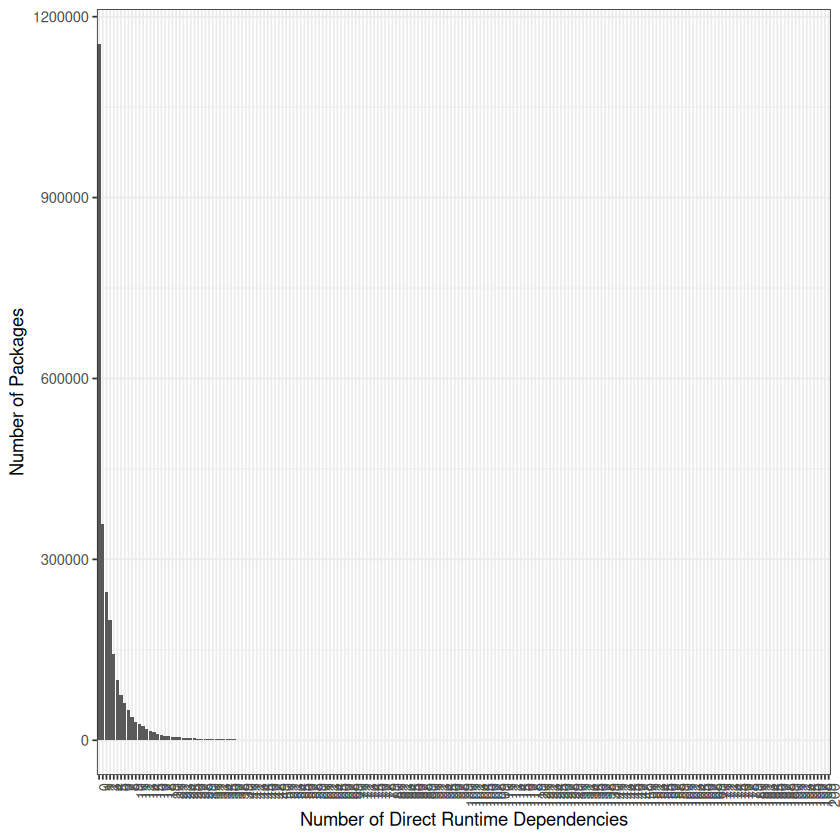

In [76]:
ggplot(num_direct_runtime_deps, aes(x = num_direct_runtime_deps, y = count)) +
    geom_bar(stat = 'identity') +
    labs(x = 'Number of Direct Runtime Dependencies', y = 'Number of Packages') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle = 90, hjust = 1)
    )

